# Black Friday Sales Prediction

[Prashant Brahmbhatt](https://www.github.com/hashbanger)

___

### The Imports

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML
import warnings 

warnings.filterwarnings('ignore')

In [69]:
sns.set_style('darkgrid')

### Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (**age, gender, marital status, city_type, stay_in_current_city**), product details (**product_id and product category**) and **Total purchase_amount** from last month.  
  
Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.  




### Getting to know the data

In [70]:
df = pd.read_csv('data/train.csv')

In [71]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [73]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


#### Looking out for missing values

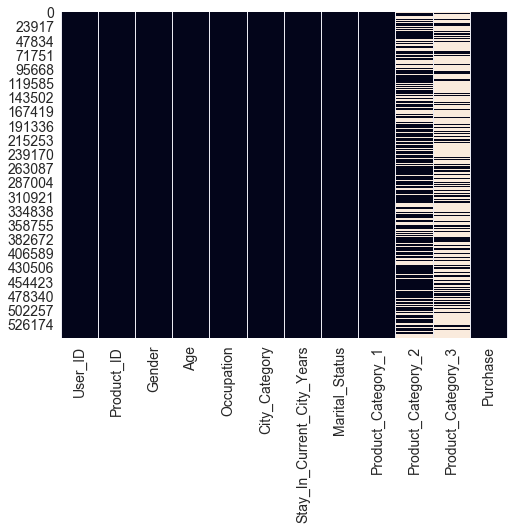

In [74]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cbar = False)
plt.show()

We can observe that there are only missing values in two of the columns.  
We better look for the proportion of the missing values before deciding what to do eith them.

#### Finding the ratio of missing values to the total observations.

In [75]:
print("Missing values in Product_Category_2 ",sum(df.isnull().iloc[:,-3]))
print("Missing values in Product_Category_3 ",sum(df.isnull().iloc[:,-2]))

Missing values in Product_Category_2  173638
Missing values in Product_Category_3  383247


In [76]:
print("Missing values in Product _Category_2 ", (sum(df.isnull().iloc[:,-3])/len(df))*100)
print("Missing values in Product_Category_3 ",(sum(df.isnull().iloc[:,-2])/len(df))*100)

Missing values in Product _Category_2  31.56664266963357
Missing values in Product_Category_3  69.67265865311198


In [77]:
temp = pd.DataFrame(df['Product_Category_2'].value_counts())

In [78]:
temp.reset_index(inplace=True)
temp.rename(columns={'index': 'category', 'Product_Category_2': 'Counts'}, inplace= True)

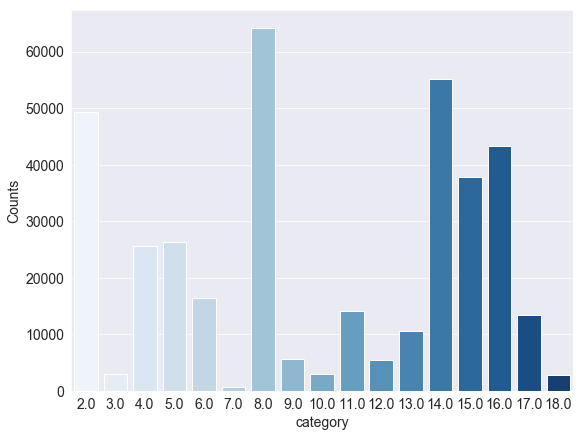

In [79]:
plt.figure(figsize= (9,7))
sns.barplot(temp['category'], temp['Counts'], palette= 'Blues')
plt.show()

Rather than Imputing for now we are taking the approach for considering unknown also as a separate catgory

In [80]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(-1)

So now the values -1 in the product category represent the missing values or unknowns.

Now we go through each cartegory one by one.

## EDA

### *User_ID* and *Product_ID*

Most probably the **User_ID** and **Product_ID** will not be telling factor for the **Purchase**. We can confirm with a basic scatter plot with the target variable at the other axis.

In [81]:
df['User_ID'].dtype

dtype('int64')

In [82]:
df['User_ID'] = df['User_ID'].astype('int')

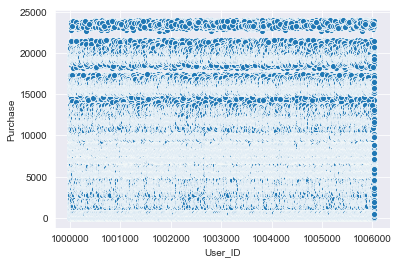

In [16]:
sns.scatterplot(df['User_ID'], df['Purchase'])

As we can see that the **User_ID** is assigned in a linear increment and no relation with the target variable.

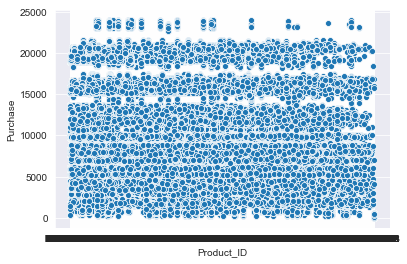

In [17]:
sns.scatterplot(df['Product_ID'], df['Purchase'])

### *Gender*

In [83]:
print(df['Gender'].dtype)

object


In [84]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

Mapping the values of gender to numeric values

In [85]:
df['GenderInt'] = df['Gender'].map(dict(M = 0, F = 1))

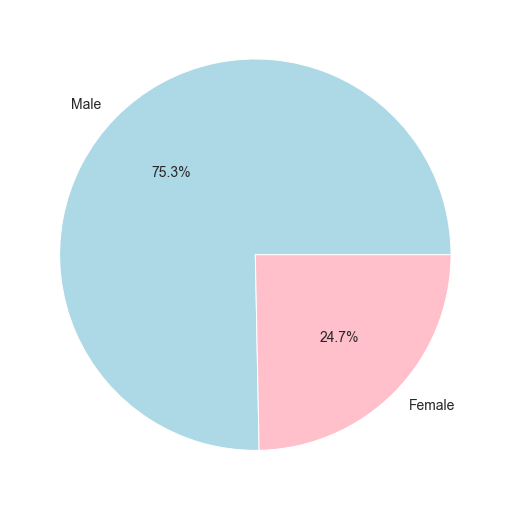

In [86]:
plt.figure(figsize=(9,9))
plt.rcParams['font.size'] = 14.0
fig = plt.pie(x = df['Gender'].value_counts(), labels = ['Male','Female'], colors= ['lightblue','Pink'], autopct = '%1.1f%%')


We can observe that the only a quarter of the customers are female.

In [87]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'GenderInt'],
      dtype='object')

In [88]:
dfMale = df[df['Gender'] == 'M']
dfFemale = df[df['Gender'] == 'F']

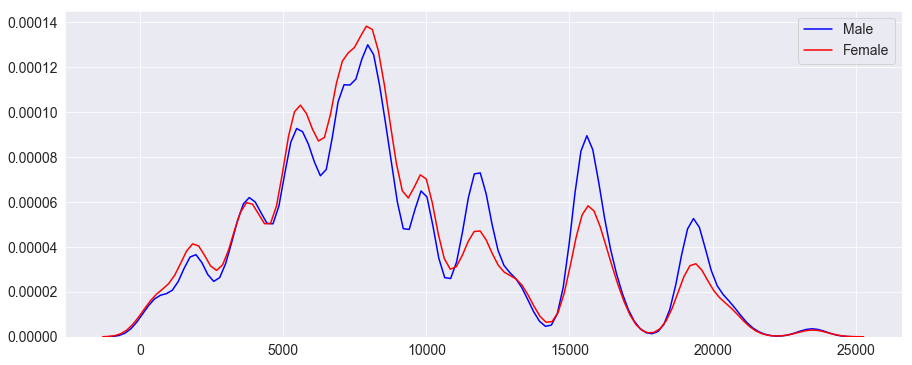

In [89]:
plt.figure(figsize=(15,6))
sns.kdeplot(dfMale['Purchase'], color = 'b', label = 'Male')
sns.kdeplot(dfFemale['Purchase'], color = 'r', label = 'Female')
plt.legend()
plt.show()

### *Age*

In [90]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

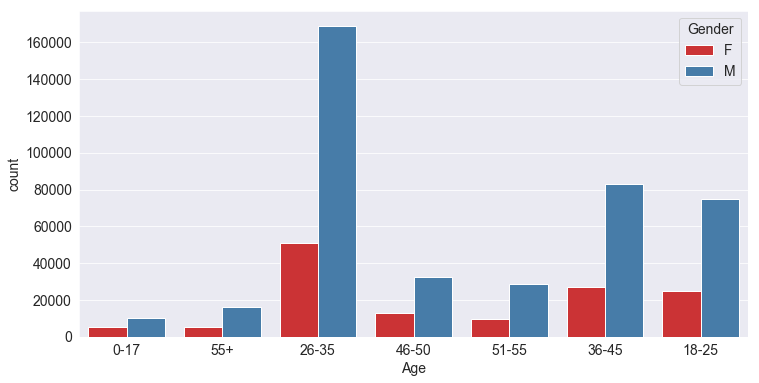

In [91]:
plt.figure(figsize=(12,6))
sns.countplot(df['Age'], hue= df['Gender'], palette= 'Set1')
plt.show()

Converting the categorical values to integers.

In [155]:
df['AgeInt'] = df['Age'].map({'0-17':0, '55+': 1, '26-35': 2, '46-50': 3, '51-55': 4, '36-45':5, '18-25': 6})

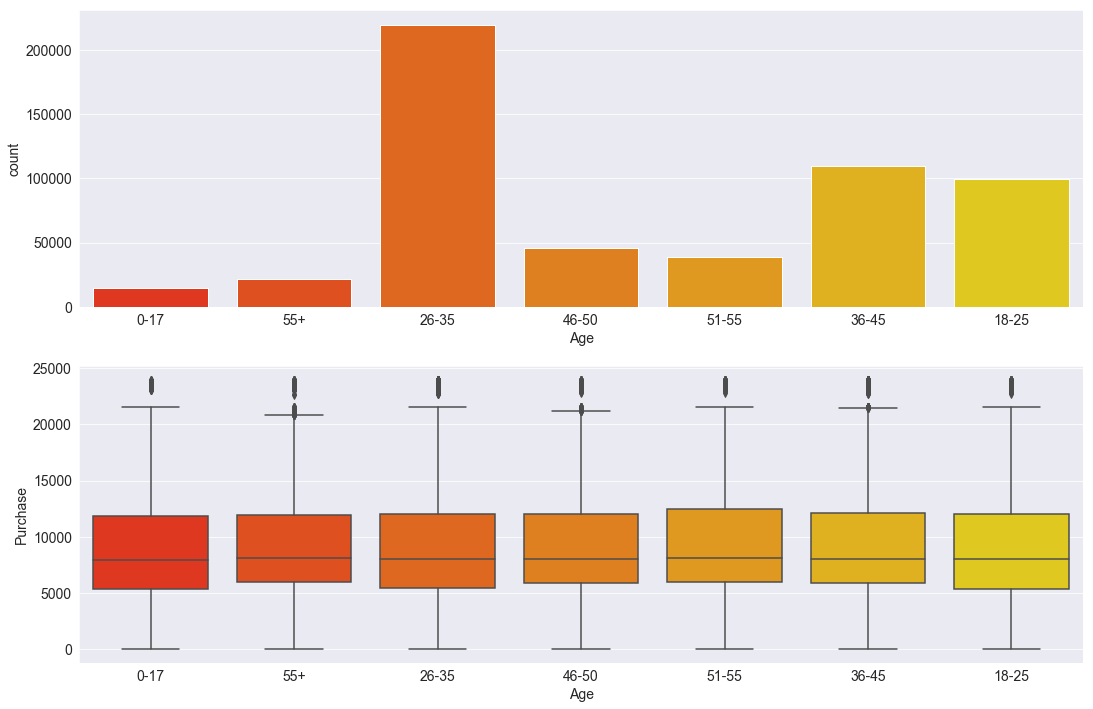

In [156]:
plt.figure(figsize=(18,12))
plt.subplot(2,1,1)
sns.countplot(df['Age'], palette= 'autumn')
plt.subplot(2,1,2)
sns.boxplot(df['Age'], df['Purchase'], palette= 'autumn')
plt.show()

### *Marital_Status*

In [92]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

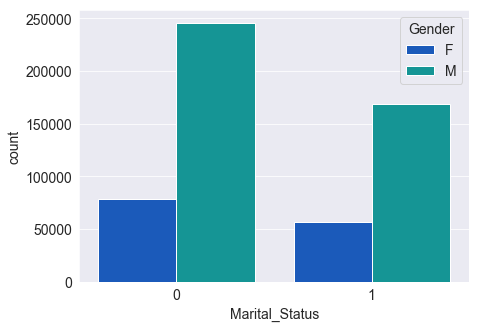

In [104]:
plt.figure(figsize=(7,5))
sns.countplot(df['Marital_Status'], hue = df['Gender'], palette= 'winter')
plt.show()

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
User_ID                       550068 non-null int32
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
GenderInt                     550068 non-null int64
dtypes: float64(2), int32(1), int64(5), object(5)
memory usage: 52.5+ MB


### *City_Category*

In [95]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

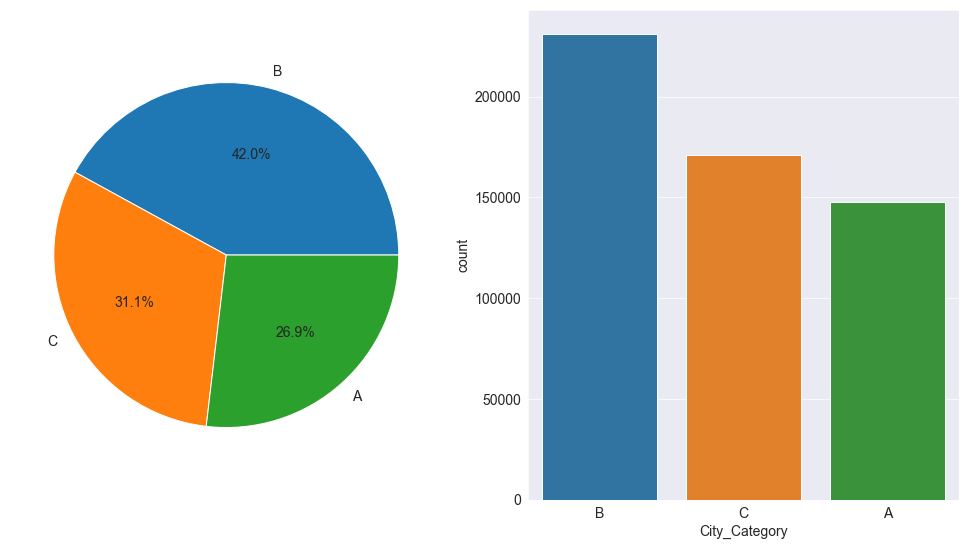

In [96]:
plt.figure(figsize=(17,9))
plt.rcParams['font.size'] = 14.0
plt.subplot(1,2,1)
plt.pie(x = df['City_Category'].value_counts(), labels = ['B', 'C', 'A'], autopct = '%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['City_Category'][::-1])

In [97]:
df['City_CategoryInt'] = df['City_Category'].map(dict(A = 0, B = 1, C = 2))

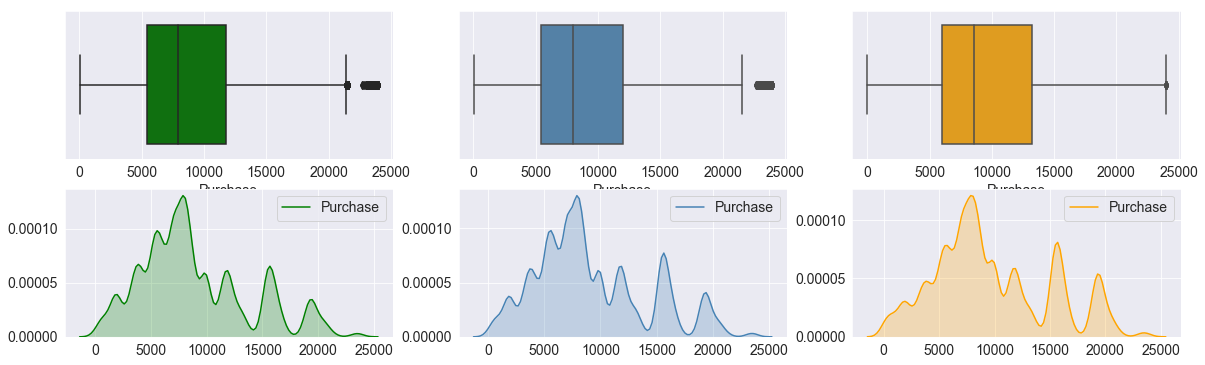

In [120]:
plt.figure(figsize=(20,6))
plt.subplot(2,3,1)
sns.boxplot(df[df['City_Category'] == 'A']['Purchase'], color= 'g')
plt.subplot(2,3,2)
sns.boxplot(df[df['City_Category'] == 'B']['Purchase'], color = '#4682B4')
plt.subplot(2,3,3)
sns.boxplot(df[df['City_Category'] == 'C']['Purchase'], color  ='orange')
plt.subplot(2,3,4)
sns.kdeplot(df[df['City_Category'] == 'A']['Purchase'], shade = True, color = 'g')
plt.subplot(2,3,5)
sns.kdeplot(df[df['City_Category'] == 'B']['Purchase'], shade = True, color = '#4682B4')
plt.subplot(2,3,6)
sns.kdeplot(df[df['City_Category'] == 'C']['Purchase'], shade = True, color = 'orange')
plt.show()

### *Occupation*

In [122]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

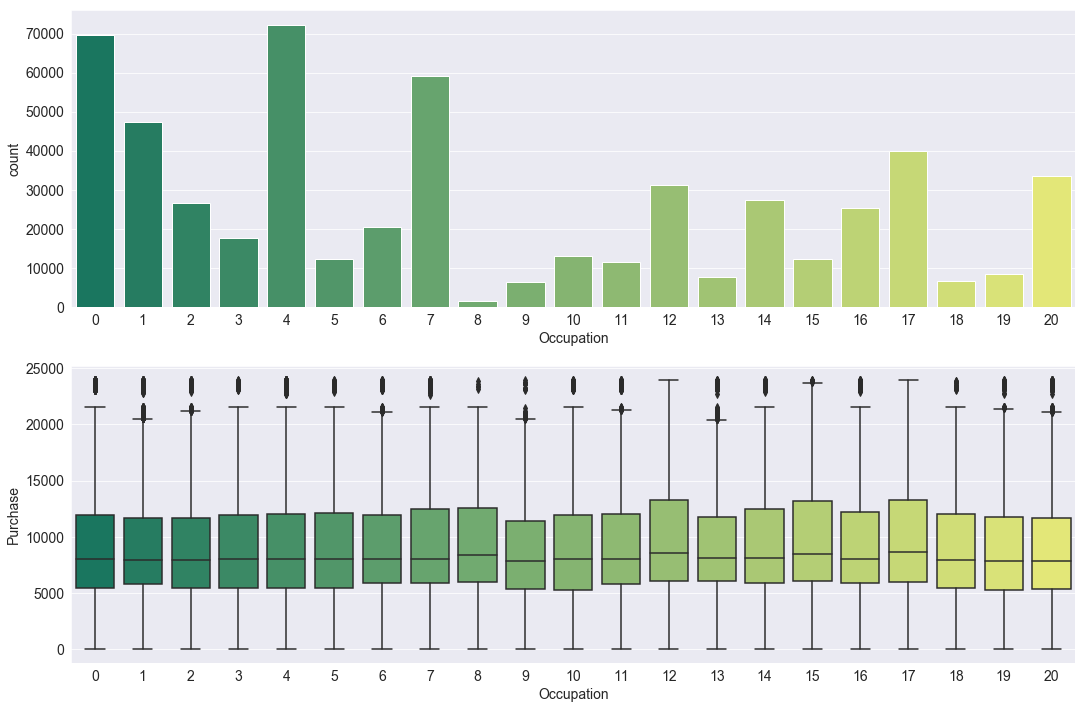

In [142]:
plt.figure(figsize=(18,12))
plt.subplot(2,1,1)
sns.countplot(df['Occupation'], palette= 'summer')
plt.subplot(2,1,2)
sns.boxplot(df['Occupation'], df['Purchase'], palette= 'summer')
plt.show()

### *Stay_In_Current_City_Years*

In [130]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

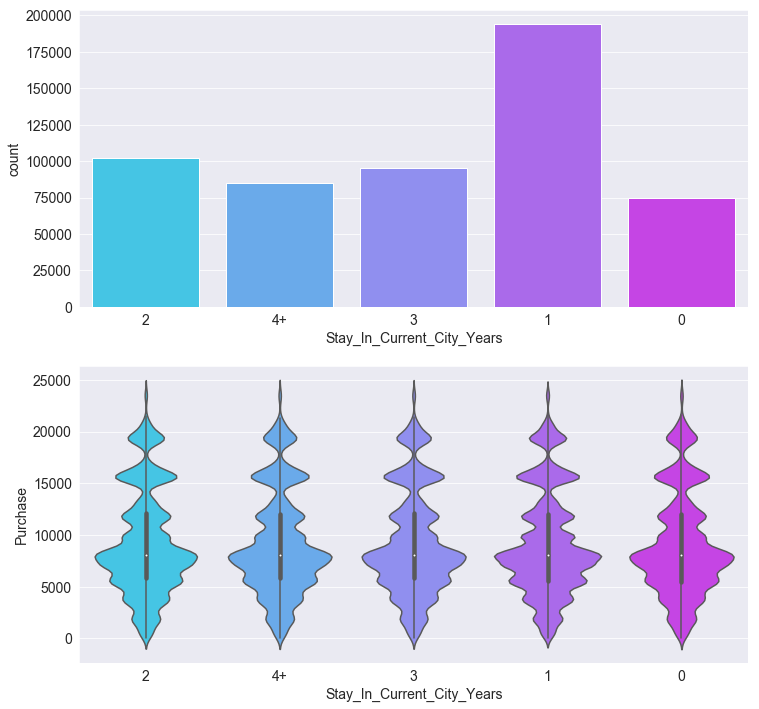

In [137]:
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.countplot(df['Stay_In_Current_City_Years'], palette= 'cool')
plt.subplot(2,1,2)
sns.violinplot(df['Stay_In_Current_City_Years'], df['Purchase'], palette= 'cool')
plt.show()

In [147]:
df['Stay_In_Current_City_Years_Int'] = df['Stay_In_Current_City_Years'].map({'0' : 0, '1' : 1, '2' : 2, '3' : 3, '4+' : 4})

### *Product_Category*

In [148]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [149]:
df['Product_Category_2'].unique()

array([-1.,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [160]:
df['Product_Category_2'] = df['Product_Category_2'].astype(int)

## Making the Model

In [345]:
for i,j in enumerate(df.columns):
    print(i,j)

0 User_ID
1 Product_ID
2 Gender
3 Age
4 Occupation
5 City_Category
6 Stay_In_Current_City_Years
7 Marital_Status
8 Product_Category_1
9 Product_Category_2
10 Product_Category_3
11 Purchase
12 GenderInt
13 City_CategoryInt
14 Stay_In_Current_City_Years_Int
15 AgeInt


In [224]:
X = df.iloc[:,[12, 15, 7, 13, 8, 9]].values
y = df.iloc[:, 11].values

In [225]:
X.shape

(550068, 6)

In [226]:
y.shape

(550068,)

In [227]:
from sklearn.model_selection import train_test_split

In [228]:
from sklearn.preprocessing import StandardScaler

In [229]:
sc = StandardScaler()

In [230]:
sc.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [231]:
X = sc.transform(X)

In [232]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.25,random_state = 101)

In [242]:
from sklearn.ensemble import RandomForestRegressor

In [244]:
regressor = RandomForestRegressor(n_estimators= 300)

In [245]:
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

##### Prediction on Test Set

In [320]:
y_pred = regressor.predict(X_test)

##### Prediction on Train Set

In [321]:
y_pred_train = regressor.predict(X_train)

In [322]:
def rmsle(real, predicted):
    sum = 0
    for i in range(len(predicted)):
        #checking for negative values
        if (predicted[i]<0) or (real[i]<0):
            continue
        p = np.log(predicted[i] + 1)
        r = np.log(real[i] + 1)
        sum = sum+((p-r)**2)
    return ((sum/len(predicted))**0.5)

In [323]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [314]:
testPrediction = pd.DataFrame(y_test, y_pred)
trainPrediction = pd.DataFrame(y_pred_train, y_train)

,0
8241.821750,5970
8203.210230,6060
5495.000145,4615
6756.354135,8654
7669.955796,9907


In [316]:
testPrediction['diff'] = np.absolute(y_pred- y_test)

#### RMSE for Test Set

In [325]:
rmse(y_pred, y_test)

2992.102344811388

#### RMSE for Train Set

In [326]:
rmse(y_pred_train, y_train)

2935.6331608625205

#### R and Adjusted R

In [332]:
def rMeasure(y_true, y_pred):
    SS_Residual = sum((y_true-y_pred)**2)
    SS_Total = sum((y_true-np.mean(y_true))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y_true)-1)/(len(y_true)-X.shape[1]-1)
    return [r_squared, adjusted_r_squared]

testR = rMeasure(y_test, y_pred)
trainR = rMeasure(y_train, y_pred_train)
print("R Squared for Test Set: \t {}\nAdjusted R Squared for Test Set: {}".format(testR[0], testR[1]))
print("R Squared for Test Set: \t {}\nAdjusted R Squared for Test Set: {}".format(trainR[0], trainR[1]))

R Squared for Test Set: 	 0.6447633813246575
Adjusted R Squared for Test Set: 0.6447478812176686
R Squared for Test Set: 	 0.6585691979993331
Adjusted R Squared for Test Set: 0.6585642322628007


In [333]:
testPrediction = testPrediction.reset_index().rename(columns = {'index' : 'Predicted', 0: 'Actual', 'diff': 'Difference'})
testPrediction.head(50) 

,Predicted,Predicted,Actual,Difference
0,0,8241.821750,5970,2271.821750
1,1,8203.210230,6060,2143.210230
2,2,5495.000145,4615,880.000145
3,3,6756.354135,8654,1897.645865
4,4,7669.955796,9907,2237.044204
5,5,4887.287691,7398,2510.712309
6,6,5912.519372,5465,447.519372
7,7,2020.998328,3512,1491.001672
8,8,10964.030496,4112,6852.030496
9,9,728.401522,740,11.598478
